In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import locale
locale.setlocale(locale.LC_ALL, '')
%matplotlib inline
import seaborn as sns
import time

sns.set(style="whitegrid")
sns.set_color_codes()
sns.set_context("paper")
sns.set(rc={"font.size":18,"axes.labelsize":22})
sns.set(font_scale=1.7)

In [53]:
aspects = [
    'Apps for Android',
    'Amazon Instant Video',
    'Baby',
    'Beauty',
    'CDs and Vinyl',
    'Cell Phones and Accessories',
    'Clothing Shoes and Jewelry',
    'Digital Music',
    'Electronics',
    'Grocery and Gourmet Food',
    'Health and Personal Care',
    'Home and Kitchen',
    'Kindle Store',
    'Movies and TV',
    'Office Products',
    'Pet Supplies',
    'Sports and Outdoors',
    'Tools and Home Improvement',
    'Toys and Games',
    'Video Games',
    'Books',
    'Musical Instruments',
    'Automotive',
    'Patio, Lawn and Garden'
]

counts = [
    752937,
    37126,
    160792,
    198502,
    1097592,
    194439,
    278677,
    64706,
    1689188,
    151254,
    346355,
    551682,
    982619,
    1697533,
    53258,
    157836,
    296337,
    134476,
    167597,
    231780,
    8898041,
    10261,
    20473,
    13272,
]

d = {
    'category': aspects,
    'number of reviews': counts
}
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(data=d)
df

,category,number of reviews
0,Apps for Android,752937
1,Amazon Instant Video,37126
2,Baby,160792
3,Beauty,198502
4,CDs and Vinyl,1097592
5,Cell Phones and Accessories,194439
6,Clothing Shoes and Jewelry,278677
7,Digital Music,64706
8,Electronics,1689188
9,Grocery and Gourmet Food,151254


In [54]:
df.describe()

,number of reviews
count,24.00
mean,757780.54
std,1802357.87
min,10261.00
25%,117033.50
50%,196470.50
75%,601995.75
max,8898041.00


In [70]:
print('All reviews: ' + str(sum(counts)))

All reviews: 18186733


In [80]:
book = df[df['category'] == 'Books']
book['number of reviews'] / sum(counts)
#print(f'Books category ratio: {}')

20   0.49
Name: number of reviews, dtype: float64

Text(0.5,1,'Amazon Reviews - Category Distribution')

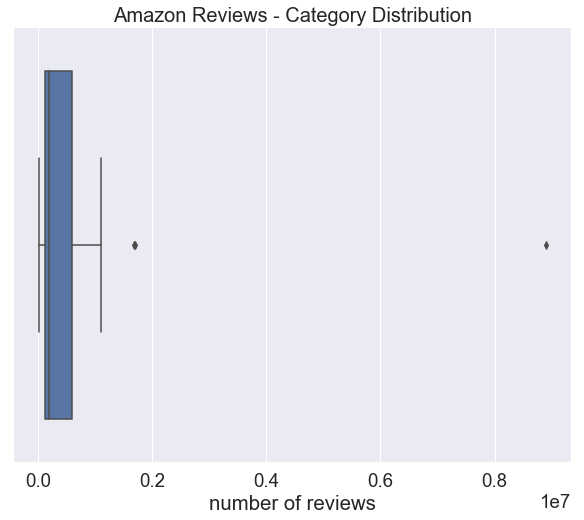

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(x="number of reviews", data=df)
plt.title(f"Amazon Reviews - Category Distribution", fontsize=20) 

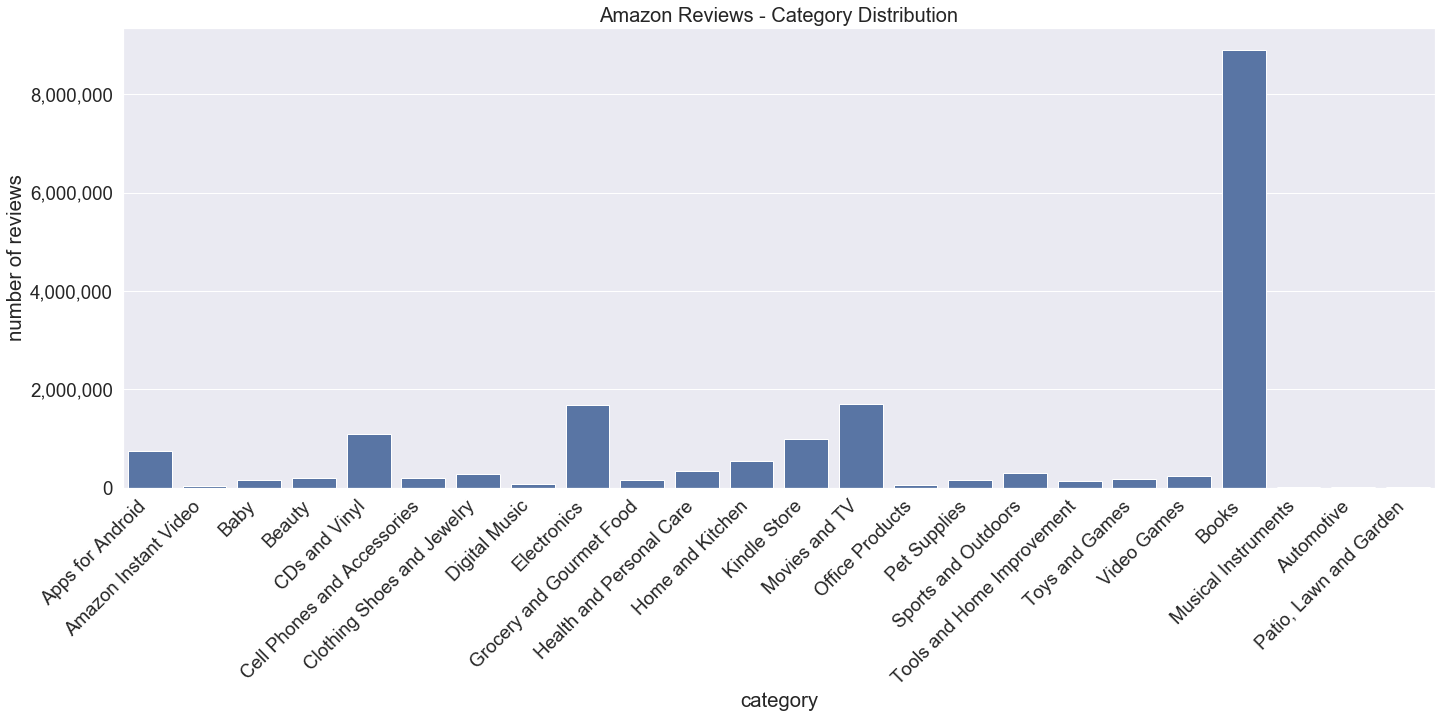

In [68]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df, color='b', x='category', y='number of reviews')
plt.title(f"Amazon Reviews - Category Distribution", fontsize=20) 
plt.xticks(rotation=45, ha="right")
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig("05_amazonReviewsCategories.pdf")